**MTRL 361 Assignment 3**

#**Layer 1**



## Answer 1.1

Evaluate the heat flux across the interface between the cold face of the mould (assumed to
be at 100 °C from the graph) and the cooling water (assumed to be at 20°C) from the graph.
Give your answer in MW/m2.

In [21]:
T_Coldface_mould = 100 #Temprature of the cold surface of the mould
T_Cool_water = 20 #Temprature of water

#Heat transfer coefficient at water/copper interface
H_w_cu = 20000 #W/m2/K

# Calculate the temperature difference
Delta_T = (T_Coldface_mould - T_Cool_water)

# Calculate the heat flux in W/m^2
heat_flux = H_w_cu*Delta_T

# Converting Heat flux to MW/m^2
heat_flux_MW = heat_flux * 1e-6

print(f"Heat flux across the mould: {round(heat_flux_MW, 2)} MW/m^2")

Heat flux across the mould: 1.6 MW/m^2


##Answer 1.2

Plot the temperature distribution across the interface. You may assume the boundary layer
thickness that forms at the interface between the mould and water is 0 mm, owing to the
high water flow rates that are normally used.

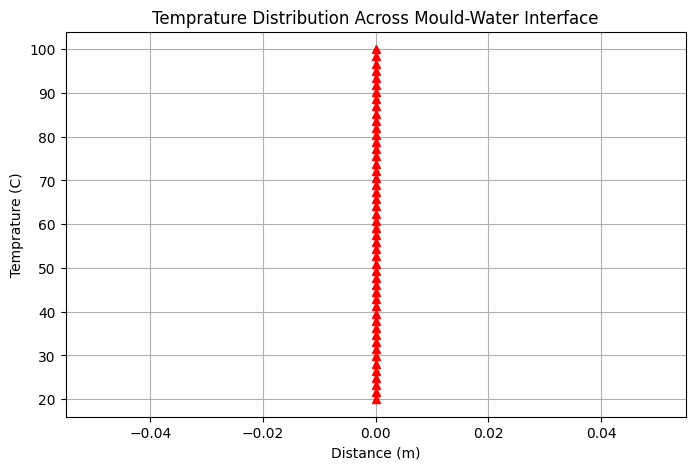

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x_pos = np.linspace(0,0) #Positions represented on the diagram

tempratures = np.linspace(T_Cool_water, T_Coldface_mould) #tempratures at positions

# Creating the plot
plt.figure(figsize=(8,5))
plt.plot(x_pos, tempratures, "r^--")
plt.title('Temprature Distribution Across Mould-Water Interface')
plt.xlabel('Distance (m)')
plt.ylabel('Temprature (C)')
plt.grid(True)
plt.show()

## Answer 1.3

Do a sensitivity analysis on the effect of varying the interface heat transfer coefficient in the
range of 15,000 to 25,000 W/m/K on the heat flux and plot it using increments in the heat transfer coefficient of 1,000 W/m/K

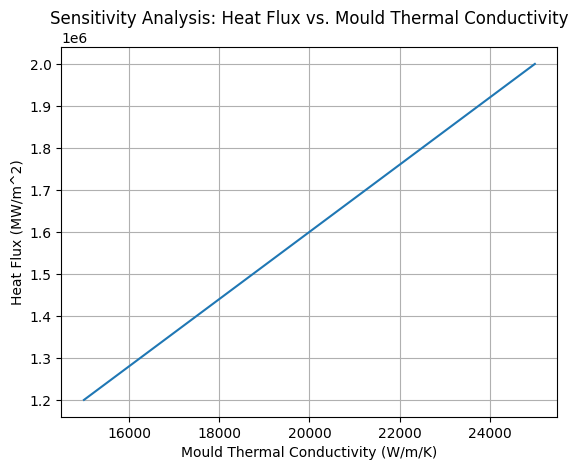

In [23]:
# Range of thermal conductivities
h_values = np.linspace(15000, 25001, 1000)  # Heat transfer coeff at increments of 1000

# Calculate heat flux values for these thermal conductivities
heat_flux_values = [(h*Delta_T) for h in h_values]  # Using the same Delta_T as answer 1.1

# Create the plot for the sensitivity analysis
plt.figure()
plt.plot(h_values, heat_flux_values)
plt.title('Sensitivity Analysis: Heat Flux vs. Mould Thermal Conductivity')
plt.xlabel('Mould Thermal Conductivity (W/m/K)')
plt.ylabel('Heat Flux (MW/m^2)')
plt.grid(True)
plt.show()

# **Layer 2**

# Answer 2.1

Plot out the temperature profile in the system, including within the mould and across the
mould/water boundary layer.

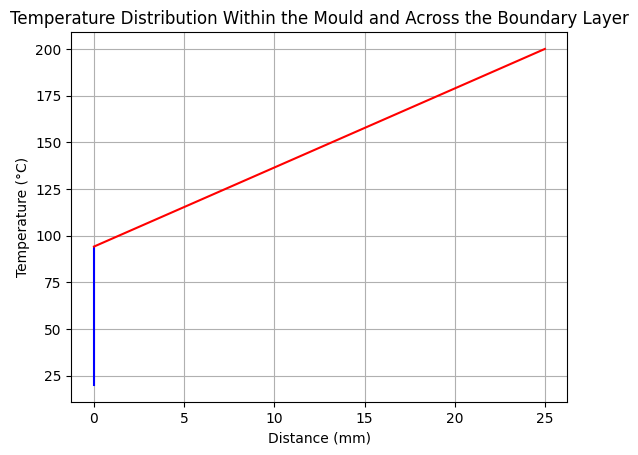

Temprature at the cold surface of the mould is: 94.12 C


In [24]:
import numpy as np
import matplotlib.pyplot as plt
k_mould = 350  # W/m/K
delta_x = 0.025  # m (converted from 25mm)
h_interface_water = 20000  # W/m^2/K
T_Hotface_mould = 200
R_mold = delta_x / (k_mould)
T_mould_hot = 200  # °C
T_water = 20  # °C

# Defining positions
x_water_mould_interface = 0
x_mould_thickness = 25

x_positions = np.linspace(x_water_mould_interface, x_mould_thickness, 100)
R_total = 1 / H_w_cu + R_mold
q_total = (T_mould_hot - T_water)/R_total
T_mould_cold = T_mould_hot - q_total * R_mold
temperatures = np.linspace(T_mould_cold, T_Hotface_mould, 100)

# Plot
plt.figure()
plt.plot([0,0], [T_Cool_water, T_mould_cold], 'b-', label='Cooling water to mould interface')
plt.plot(x_positions, temperatures, 'r-', label='Inside the mould')
plt.title('Temperature Distribution Within the Mould and Across the Boundary Layer')
plt.xlabel('Distance (mm)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

print(f"Temprature at the cold surface of the mould is: {T_mould_cold:.2f} C")

# Answer 2.2
Compare the heat flux across the mould and across the convective boundary layer at the
mould/water interface.

In [25]:
k_mould = 350  # W/m/K
delta_x = 0.025  # m (converted from 25mm)
h_interface_water = 20000  # W/m^2/K

# Calculate thermal resistances
R_mold = delta_x / (k_mould)  # for unit area
R_conv = 1 / h_interface_water  # for unit area

# Calculate heat flux using the thermal circuit
q = (T_Hotface_mould - T_Cool_water) / (R_mold + R_conv)

# Heat flux through mold only
q_mold_only = (T_Hotface_mould - T_Coldface_mould) / R_mold

# Print the results
print(f"Heat flux through Mould and water: {q:.2f} W/m^2")
print(f"Heat flux through the Mould only: {q_mold_only:.2f} W/m^2")


Heat flux through Mould and water: 1482352.94 W/m^2
Heat flux through the Mould only: 1400000.00 W/m^2


# Answer 2.3

1. Do your results for 2.1 and 2.2 make sense, with reference to Figure 2? If so, why, if not,
why?

2. Do a sensitivity analysis on the effect of varying h_interface_water on T_mould_cold. At what approximate value of h_interface_water do the results come into alignment with Figure 2?

3. Confirm in an updated plot. Why vary h_interface_water and not k_mould?

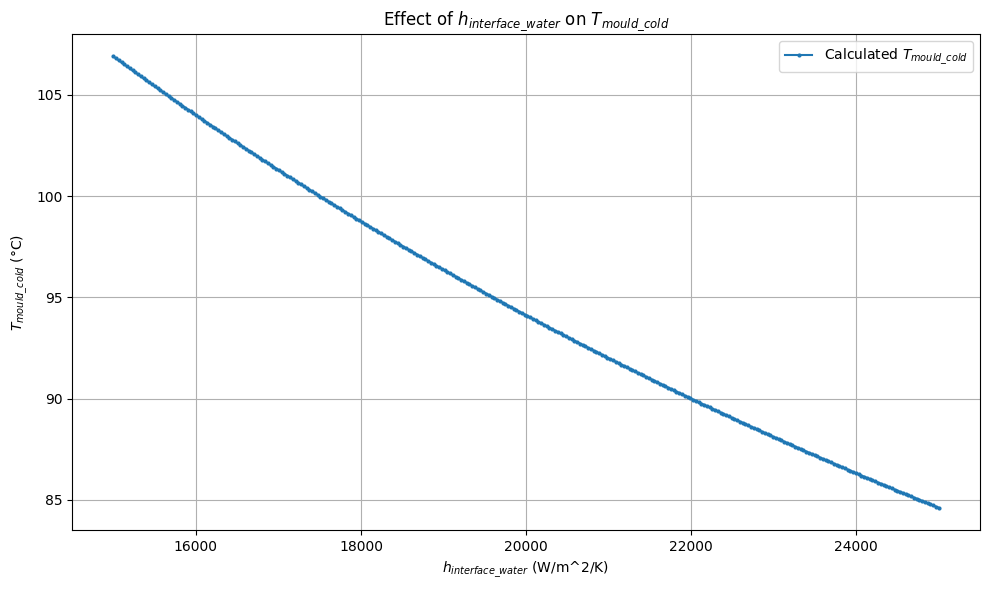

The approximate value of h_interface_water where results align with Figure 2 is: 17508 W/m^2/K


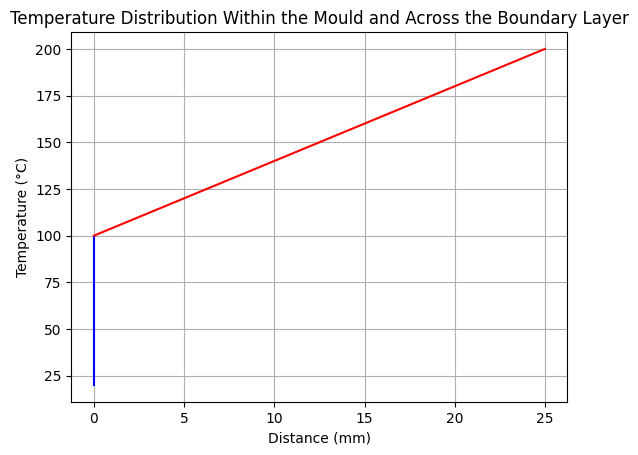

Temprature at the cold surface of the mould is: 100 C


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
T_water = 20  # °C
T_mould_hot = 200  # °C
k_mould = 350  # W/m/K
delta_x = 0.025  # m

# Calculate q_mold
R_mold = delta_x / k_mould
q_mold = (T_mould_hot - T_water) / R_mold

# Range for h_interface_water
h_values = np.linspace(15000, 25000, 300)
T_mould_cold_values = []

# Calculate T_mould_cold for each h_value
for h in h_values:
    R_total = 1 / h + R_mold
    q_total = (T_mould_hot - T_water)/R_total
    T_mould_cold = T_mould_hot - (q_total * R_mold)
    T_mould_cold_values.append(T_mould_cold)

    if T_mould_cold > 99.95 and T_mould_cold < 100.05:
        H_acc_value = h
        T_updated_Coldmould = T_mould_cold

# Plotting
plt.figure(figsize=(10,6))
plt.plot(h_values, T_mould_cold_values, '-o', markersize=2, label='Calculated $T_{mould\_cold}$')
plt.xlabel('$h_{interface\_water}$ (W/m^2/K)')
plt.ylabel('$T_{mould\_cold}$ (°C)')
plt.legend()
plt.title('Effect of $h_{interface\_water}$ on $T_{mould\_cold}$')
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the h_value where T_mould_cold is closest to 100°C
index_closest = np.argmin(np.abs(np.array(T_mould_cold_values) - 100))
h_value_closest = H_acc_value
print(f"The approximate value of h_interface_water where results align with Figure 2 is: {round(H_acc_value)} W/m^2/K")

# Updating the Temperature distribution from part 2.1
temperatures_updated = np.linspace(T_updated_Coldmould, T_Hotface_mould, 100)

#plotting the updated temperature distrubution
plt.figure()
plt.plot([0,0], [T_Cool_water, T_updated_Coldmould], 'b-', label='Cooling water to mould interface')
plt.plot(x_positions, temperatures_updated, 'r-', label='Inside the mould')
plt.title('Temperature Distribution Within the Mould and Across the Boundary Layer')
plt.xlabel('Distance (mm)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

print(f"Temprature at the cold surface of the mould is: {round(T_updated_Coldmould)} C")

# **Layer 3**


## Answer 3.1

Plot out the temperature profile across the liquid, mushy region, solid shell and mould and
include the changes in temperature across the two interfaces.

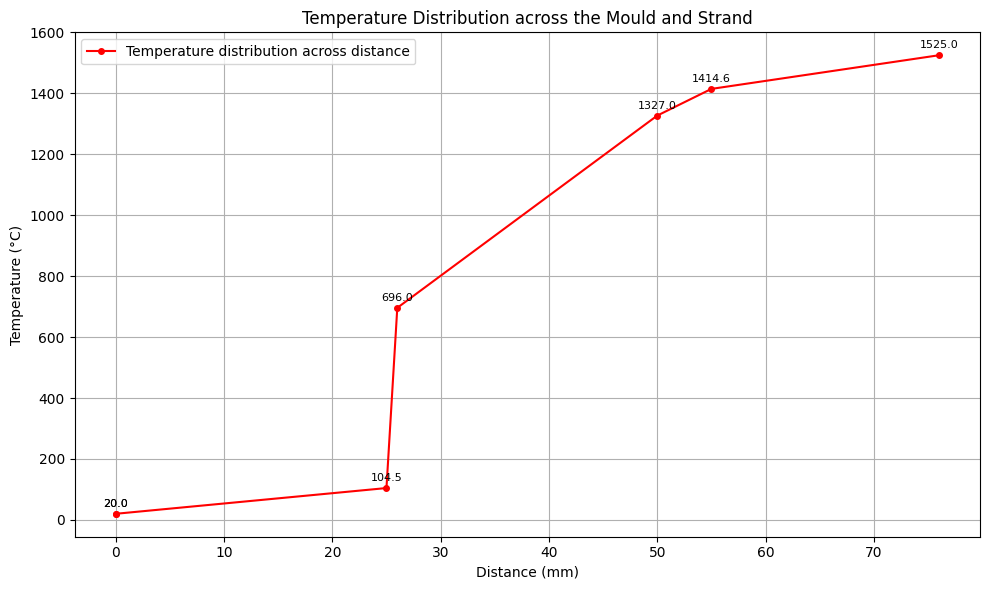

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Given Data that has not been defined yet
K_solid_steel = 45 # W/m/K
K_semisolid_steel = 45*1.5 # W/m/K
K_liq_steel = 45*5 # W/m/K
H_w_cu = 20000 # W/m^2/K
H_ss_m = 2000 # W/m^2/K
T_liq_metal = 1525

x_solid_steel = 24/1000 #mm
x_mould = 25/1000 #mm
x_gap = 1/1000 #mm
x_mushy = 5/1000 #mm
x_liq = (50 - 29)/1000 #mm

# Thermal Resistance
R_ss = x_solid_steel/K_solid_steel
R_mushy = x_mushy/K_semisolid_steel
R_liq = x_liq/K_liq_steel
R_air = 1/H_ss_m
Total_R = R_ss + R_mushy + R_liq + R_air + R_mold

# Calculating flux
q_sys = (T_liq_metal - T_Cool_water)/Total_R

# Calculate Intermediate Tempratures
t_mushy_hot = T_liq_metal - (q_sys*R_liq)
t_mushy_cold = t_mushy_hot - (q_sys*R_mushy)
t_solid_cold = t_mushy_cold - (q_sys*R_ss)
T_mould_hot = t_solid_cold - (q_sys*R_air)
T_mould_cold = T_mould_hot - (q_sys*R_mold)

# Create arrays to store the data
Temp = np.array([T_liq_metal,t_mushy_hot,t_mushy_cold,t_solid_cold,T_mould_hot,T_mould_cold,T_Cool_water])
Dist = np.array([(x_mould+x_gap+x_solid_steel+x_mushy+x_liq)*1000, (x_mould+x_gap+x_solid_steel+x_mushy)*1000,
                 (x_mould+x_gap+x_solid_steel)*1000, (x_mould+x_gap)*1000, (x_mould)*1000, 0, 0])

# Plot
plt.figure(figsize=(10,6))
plt.plot(Dist, Temp, 'r-', marker='o', markersize=4, label= 'Temperature distribution across distance')

# Annotate data points with their values
for i, (d, t) in enumerate(zip(Dist, Temp)):
    plt.annotate(f'{t:.1f}', (d, t), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

plt.title('Temperature Distribution across the Mould and Strand')
plt.xlabel('Distance (mm)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Answer 3.3

Use a sensitivity analysis to estimate the value you would use for that parameter.

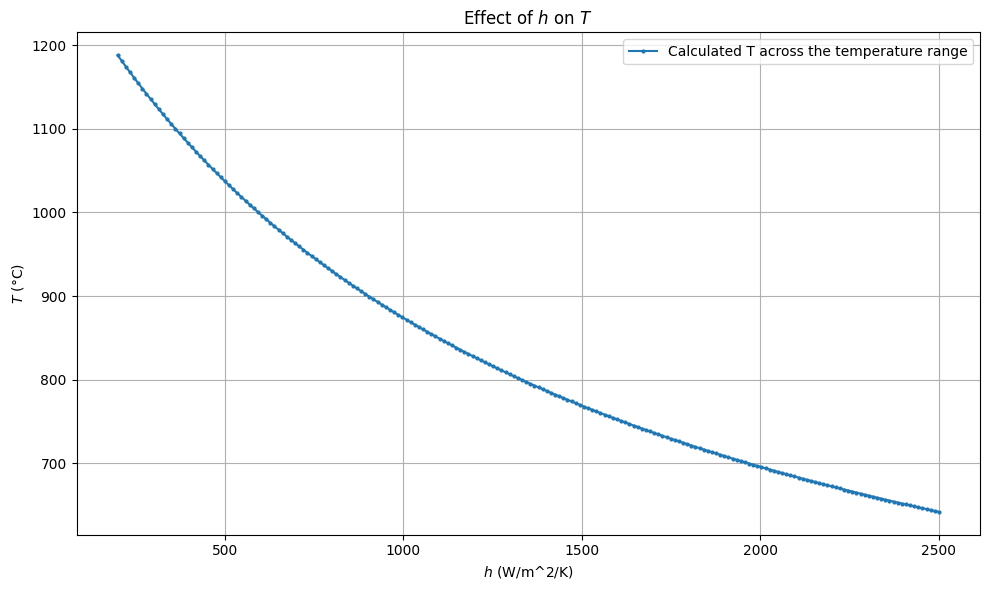

The approximate value of Heat transfer coefficient at which temprature of the solid metal closest to 1100 C is: 408 W/m^2/K


In [31]:
# Range for h_interface_water
h_values_updated = np.linspace(200, 2500, 200)
T_values = []

# Calculate T for each h_value
for h in h_values_updated:
    R_total_updated = (1 / h) + Total_R
    q_total_updated = (T_liq_metal - T_water)/(R_total_updated - R_air)
    T_updated = t_mushy_cold - (q_total_updated * R_ss)
    T_values.append(T_updated)

    if T_updated > 1075 and T_updated < 1125:
        H_updated = h

# Plotting
plt.figure(figsize=(10,6))
plt.plot(h_values_updated, T_values, '-o', markersize=2, label='Calculated T across the temperature range')
plt.xlabel('$h$ (W/m^2/K)')
plt.ylabel('$T$ (°C)')
plt.legend()
plt.title('Effect of $h$ on $T$')
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the h_value where T is closest to 1100°C
index_closest = np.argmin(np.abs(np.array(T_values) - 1100))
h_value_closest_1100 = H_updated
print(f"The approximate value of Heat transfer coefficient at which temprature of the solid metal closest to 1100 C is: {round(H_updated)} W/m^2/K")

